In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import mglearn

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [4]:
cancer = load_breast_cancer()

### PCA 적용해서 유방암 데이터셋 시각화하기

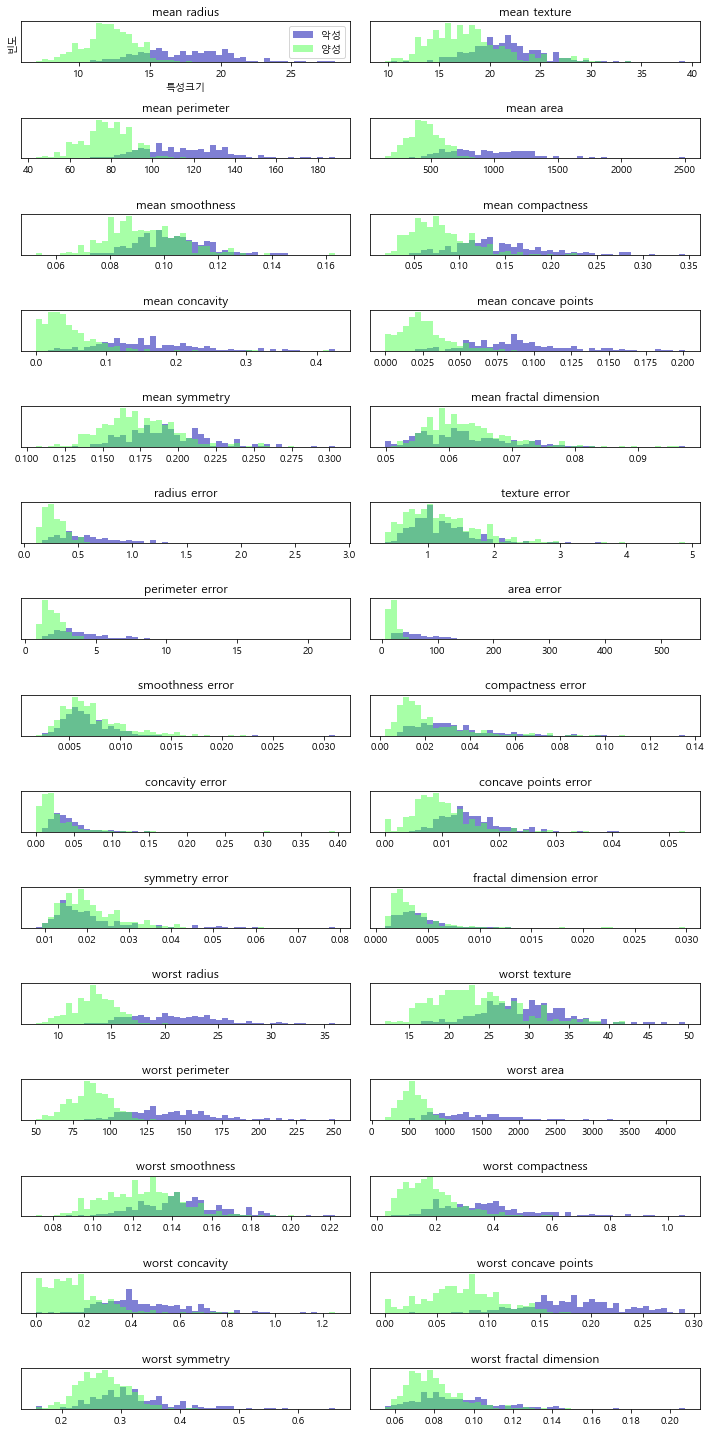

In [7]:
fig, axes = plt.subplots(15, 2, figsize=(10,20))

malignant = cancer.data[cancer.target==0] #악성
benign = cancer.data[cancer.target==1] #양성

ax = axes.ravel() #차원축소

for i in range(30) :
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('특성크기')
ax[0].set_ylabel('빈도')
ax[0].legend(['악성','양성'], loc='best')
fig.tight_layout()

### 양성, 악성별 주성분 그래프 그려보기

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
x_scale = scaler.transform(cancer.data)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(x_scale)

PCA(n_components=2)

In [10]:
# 처음 두 개의 주성분을 사용해서 데이터 변환
x_pca = pca.transform(x_scale)

In [11]:
print('원본 데이터 형태 :', str(x_scale.shape))
print('축소된 데이터 형태 :', str(x_pca.shape)) #569개 행, 2개 feature

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


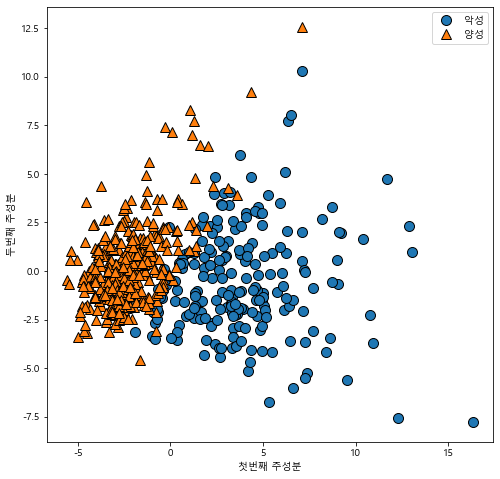

In [12]:
# 클래스를 색깔로 구분해서 처음 두 개 주성분을 그래프로 나타내기
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], cancer.target)
plt.legend(['악성','양성'], loc='best')
plt.xlabel('첫번째 주성분')
plt.ylabel('두번째 주성분')
plt.show()

In [13]:
print('주성분 :', pca.components_)

주성분 : [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]
